In [1]:

def read_data(vib):
    dat=pd.read_csv(vib)
    #sensorname=pd.Series(dat.keys()[2:-1])
    sensorname=dat.keys()[2:-1] #geht beides
    return dat, sensorname

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

General look at data, quantity, organized?

In [4]:

def explore(data):
    print('Data overview: ')
    print(data.shape); print()
    print('keys :') ; print(data.keys()); print()
    print( 'status options: ');  print( data['machine_status'].unique()); print()
    print (data['machine_status'].value_counts()); print()
    info=data.describe()
    varianz=pd.DataFrame({'var':data.var()})
    info=pd.concat([info,varianz.transpose()])
    return data.head(), data.tail(), info
   

Data manipulation after general look at it

In [5]:
     
def manipulate_X(data, printplot=False): 
    data=data.drop(labels=['sensor_15'],axis=1)
    data=data.drop(labels=['sensor_00'],axis=1)

    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] 
    data=data.drop(labels=['sensor_50'],axis=1)


    data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)# low varianz#NaNs
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()
    if printplot==True:
        print((data.isna().sum()))
        plotting_stuff((data.isna().sum()[2:-1]),'bar','fill_nan',saving=True)
        
    return data    
    


In [6]:
def plotting_stuff(data,plottype,Title, saving=False):
    #plt.plot(dat.loc[:,['sensor_01']])
    fig=plt.figure()
    data.plot(kind=plottype)
    #plt.stem(data)
    plt.title(Title)
    #plt.xticks(rotation=45)
    if saving==True:
        plt.savefig(Title+'.png', format='png', dpi=300, transparent=True)    
    #fig.show()
    


In [7]:
def plotting_merged(data, encoded_y, sensorname, saving=False):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_dat = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    for i in sensorname:
        fig=plt.figure()
        ax=scaled_dat[i].plot.line()
        encoded_y.plot(ax=ax)
        plt.title('together_' + str(i) )
        plt.legend(['sensor','target'])
        if saving==True:
            fig.savefig('Sensor_'+str(i)+'.png', format='png', dpi=300, transparent=True)
        plt.show()    


In [8]:

def plotting_together(Values): 
    fig=plt.Figure()
    Values.plot(subplots = True, sharex = True, figsize=(30,55))    
    plt.savefig('Overview.png', format='png', dpi=300, transparent=True)
    plt.show      
    


In [ ]:
def plot_Y(data, col='target', saving=False, name='target'):
    import numpy as np
    y=data[col]; x=np.linspace(1,len(y),len(y))
    plt.plot(x,y)
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    if col=='target':
        plt.yticks([1,0,2], labels, rotation='vertical')
    elif col=='machine_status':
        plt.yticks([0,1,2], labels, rotation='vertical')
    if saving==True:
        plt.savefig(name+'.png', format='png', dpi=300, transparent=True)
    plt.show()   



Checking target operation, supervised or not?

In [ ]:

def preprocess(data):
    from sklearn import preprocessing

    #Label Mapping
    le = preprocessing.LabelEncoder()
    le.fit(data)
    encoded_y=le.transform(data)
    #Get the Label map
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    return pd.DataFrame(encoded_y,columns=['target'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat,sensorname=read_data('./drive/MyDrive/vib.csv')

Data overview of 52 sensor column,
machine states timestamp.


In [ ]:
headtop,lng, untd=explore(dat)


Data overview: 
(220320, 55)

keys :
Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

status options: 
['NORMAL' 'BROKEN' 'RECOVERING']

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype

<ipython-input-3-45c4ec52af0c>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  varianz=pd.DataFrame({'var':data.var()})


one-machine:many-sensors supervised learning task overview

plotting NA sensors, checking variance


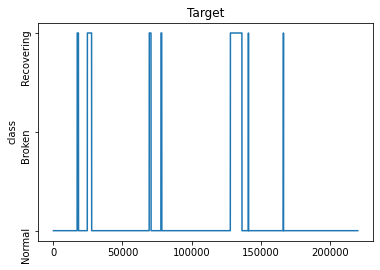

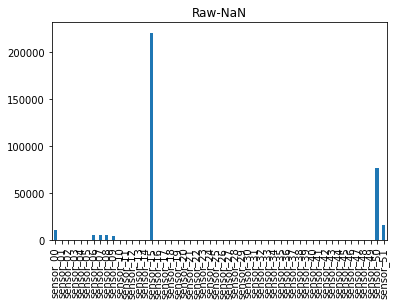

<Figure size 432x288 with 0 Axes>

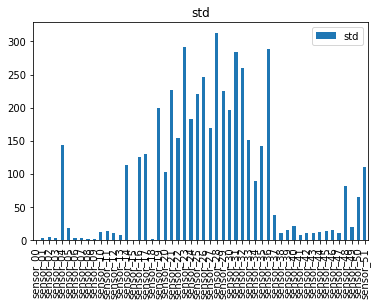

<Figure size 432x288 with 0 Axes>

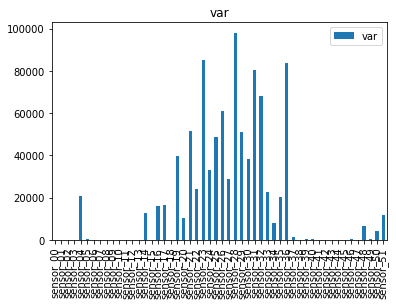

In [ ]:

'''
Checking for Nans, 
Checking for std
'''
untd_std=untd.loc[['std']][sensorname]
untd_var=untd.loc[['var']][sensorname]

plot_Y(dat,col='machine_status',saving=False,name='Klassen')
plotting_stuff((dat.isna().sum())[2:-1],'bar','Raw-NaN',saving=False) # show which sensors have how many NANs
plotting_stuff(untd_std.transpose(),'bar','std',saving=True)# Show std
plotting_stuff(untd_var.transpose(),'bar','var',saving=True)# Show std



<ipython-input-5-73b762de24a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000]


Unnamed: 0        0
timestamp         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0
machine_status    0
dtype: int64


,Unnamed: 0,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_10,sensor_11,sensor_12,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,0,2018-04-01 00:00:00,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,1,2018-04-01 00:01:00,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2,2018-04-01 00:02:00,47.35243,53.211800,46.397570,638.888900,73.54598,37.86777,48.17723,32.08894,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,3,2018-04-01 00:03:00,47.09201,53.168400,46.397568,628.125000,76.98898,38.57977,48.65607,31.67221,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,4,2018-04-01 00:04:00,47.13541,53.211800,46.397568,636.458300,76.58897,39.48939,49.06298,31.95202,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,47.69965,50.520830,43.142361,634.722229,64.59095,43.17085,54.16052,38.05424,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,47.69965,50.564240,43.142361,630.902771,65.83363,43.21038,54.52602,38.53485,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,47.69965,50.520830,43.142361,625.925903,67.29445,43.12836,55.11779,38.52678,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,47.69965,50.520832,43.142361,635.648100,65.09175,42.35746,55.99321,38.89159,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,234.0856,NORMAL


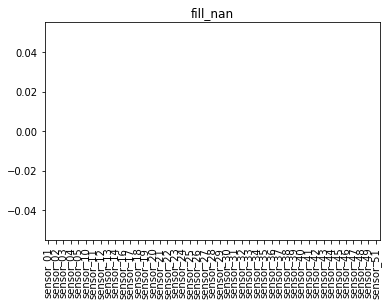

In [ ]:

'''
renoving NaNs
removing faulty sensors
removing low varianz sensors
'''
manipulate_X(dat, printplot=True)


<ipython-input-6-7285a38ef35e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()
<ipython-input-6-7285a38ef35e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()
<ipython-input-6-7285a38ef35e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()
<ipython-input-6-7285a38ef35e>:3: 

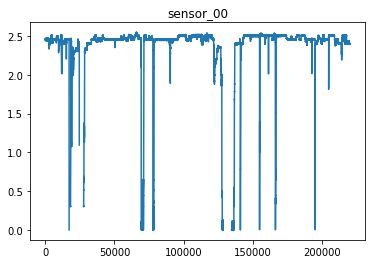

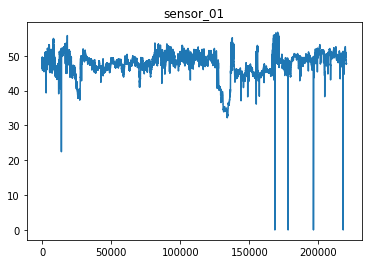

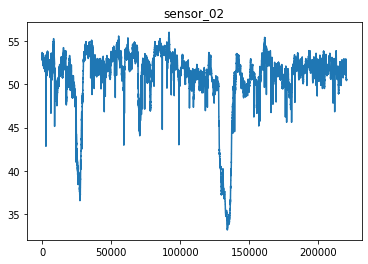

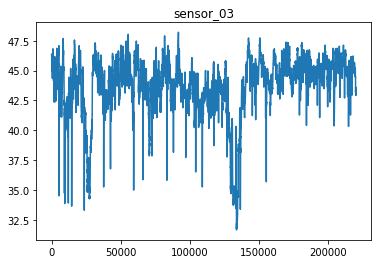

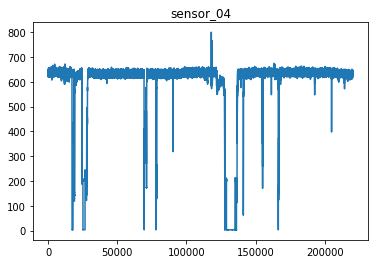

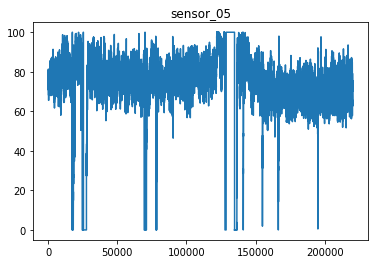

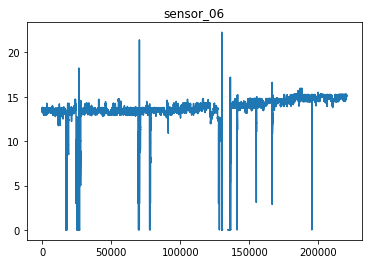

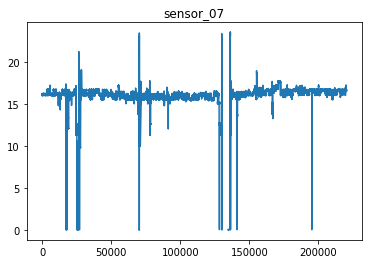

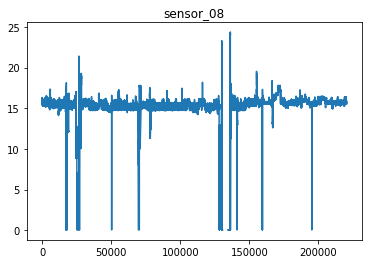

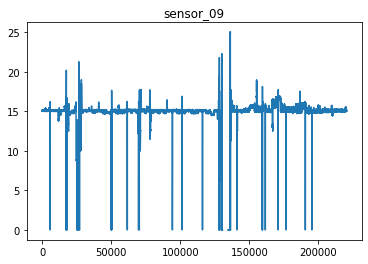

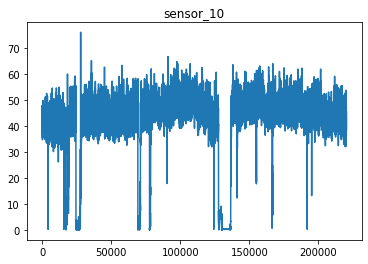

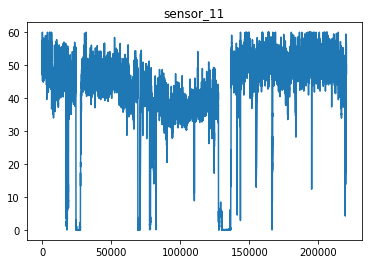

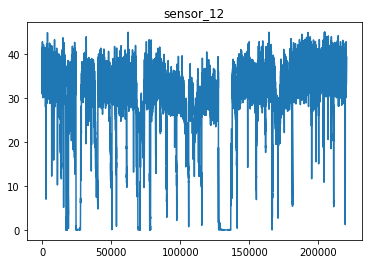

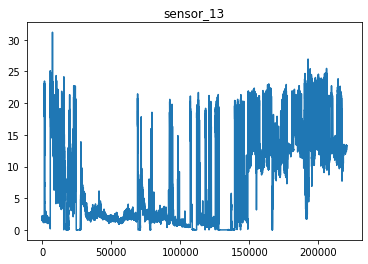

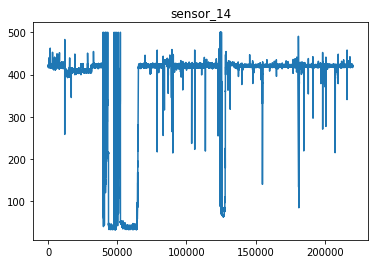

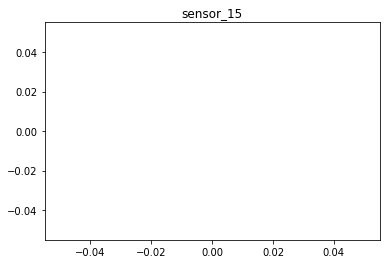

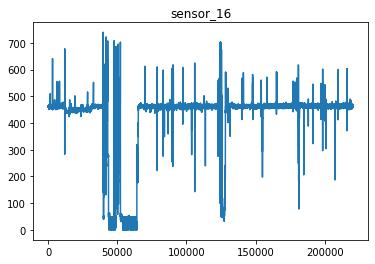

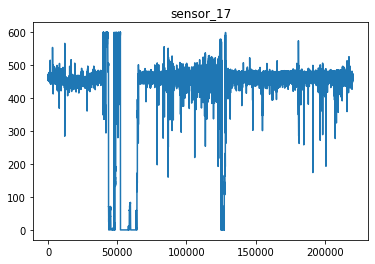

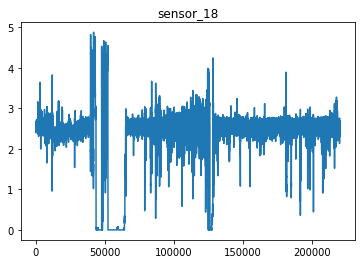

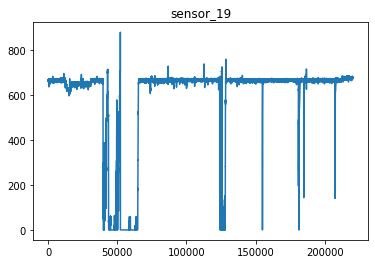

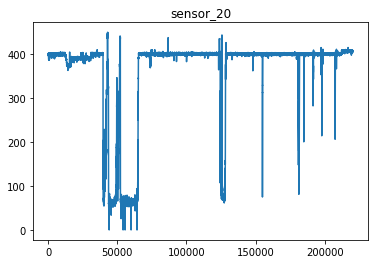

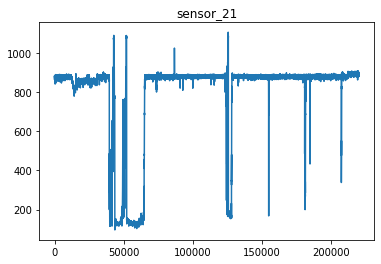

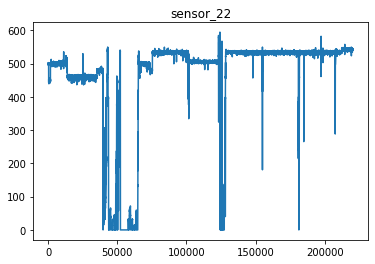

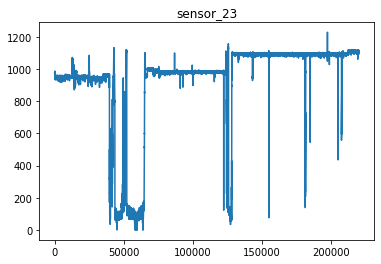

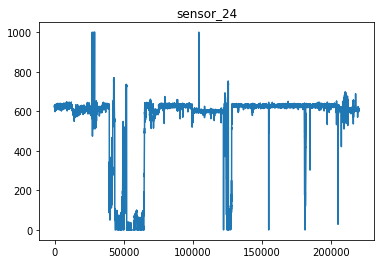

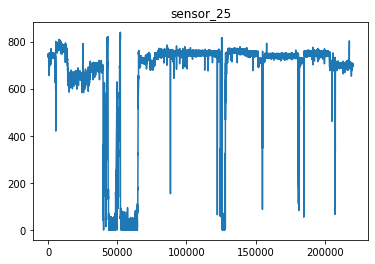

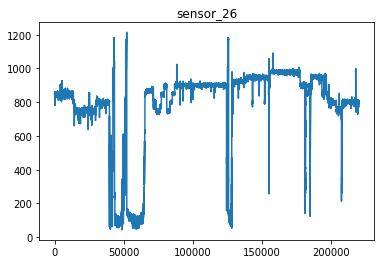

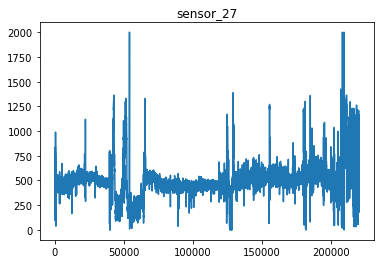

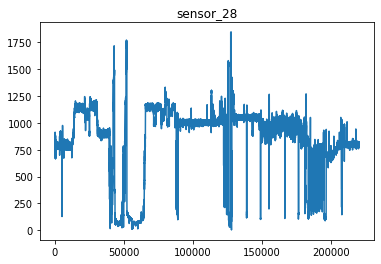

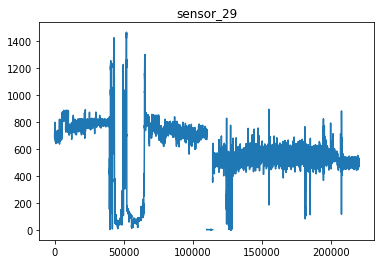

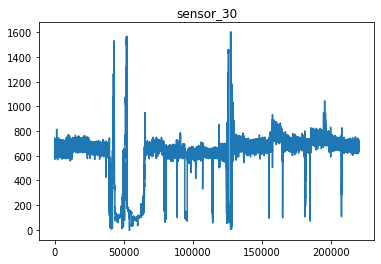

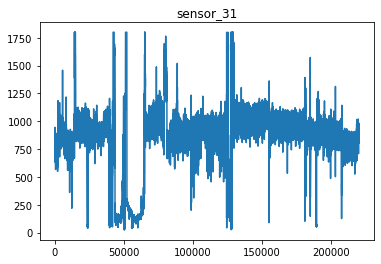

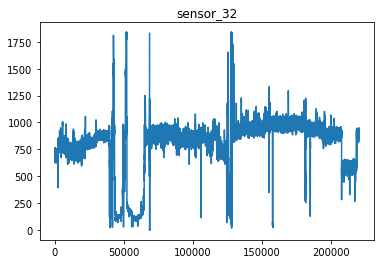

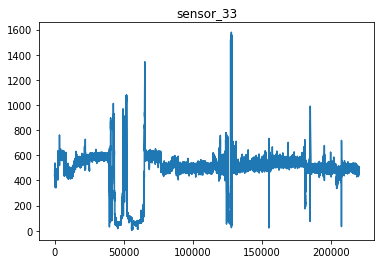

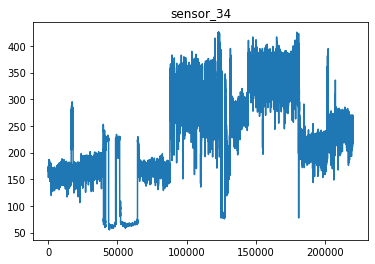

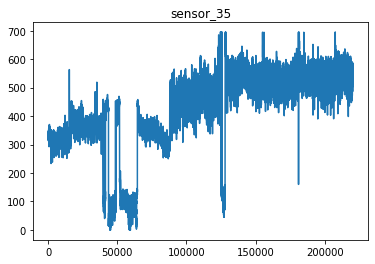

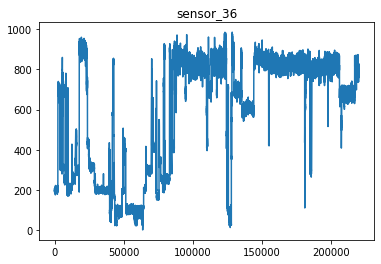

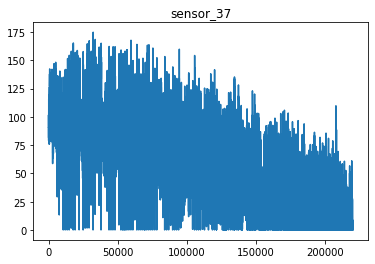

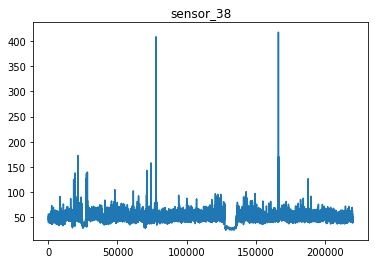

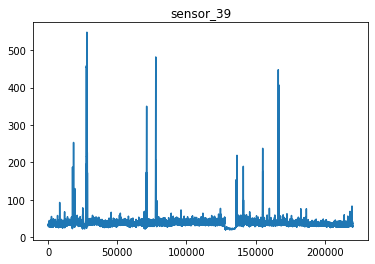

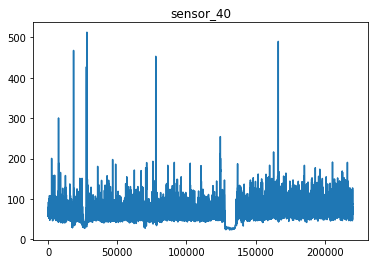

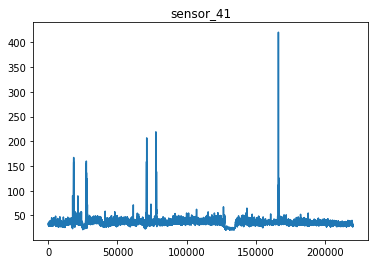

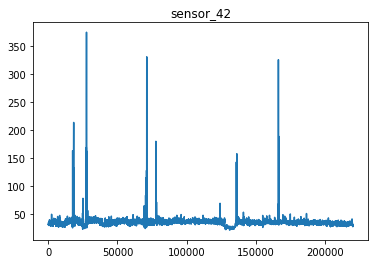

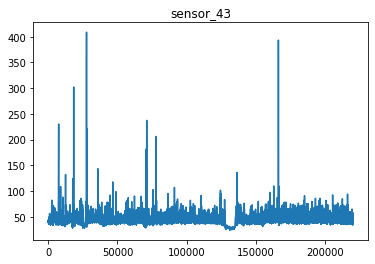

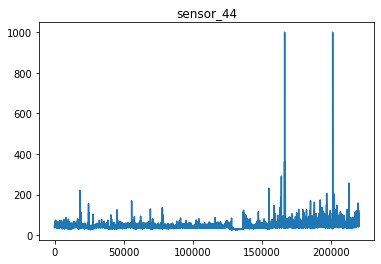

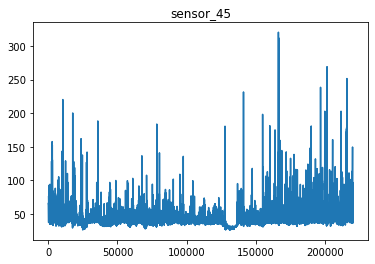

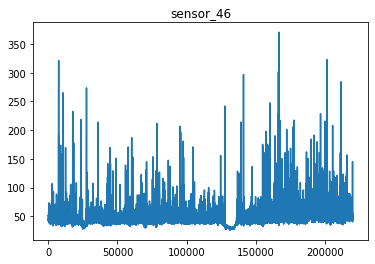

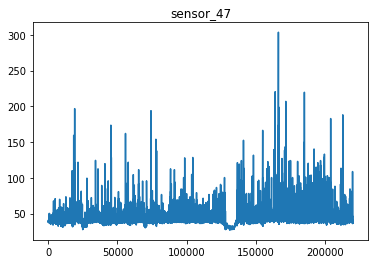

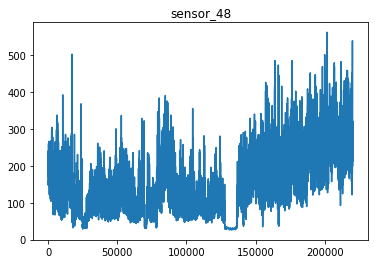

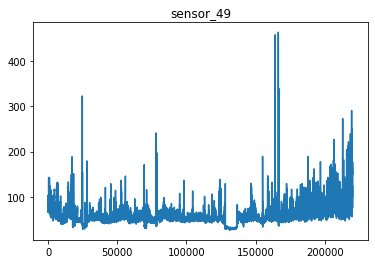

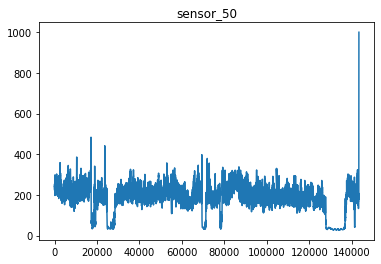

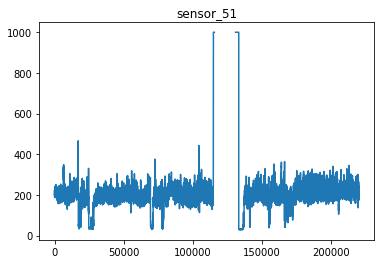

In [ ]:

'''
Plotting the sensor signals raw
'''
for i in sensorname:
     plotting_stuff(dat[i],'line',str(i))
  

{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


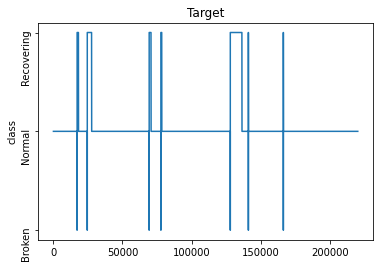

In [ ]:
'''
Plotting sensor and label together
'''
encoded_y=preprocess(dat['machine_status']);   
#laenge=counting_target(dat)

plot_Y(encoded_y,col='target', saving=True , name='Klassen')

# Values=pd.concat([dat[sensorname],encoded_y],axis=1)#.reindex(dat.index)
# plotting_merged(dat[sensorname],encoded_y, sensorname,saving=True)# plot each singal with target
# plotting_together(Values) #plot all signals together with target

        